# Initialization

This notebook will train the Logistic Regression in **One vs Rest** decision function. The Multinomial Logistic Regression is in the Softmax Regression notebook

Connect to Google Drive:

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# %cd '/content/drive/MyDrive/GitHub/emotion-dectection-from-text'

Preparing necessary packages (may need to add more):

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from joblib import dump, load

from preset_function import evaluate_model, draw_learning_curve, load_processed_data

X_train_bow, X_test_bow, X_train_tfidf, X_test_tfidf, \
    X_train_bow_L1, X_test_bow_L1, X_train_tfidf_L1, X_test_tfidf_L1 = load_processed_data('input')

y_train, y_test = load_processed_data('output')

%matplotlib inline

Select dataset:

In [4]:
X_train = X_train_bow_L1
X_test = X_test_bow_L1

# Basic training

In [5]:
lr_model = LogisticRegression(multi_class='ovr')
lr_model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

Score of on train are:
	- Accuracy score: 0.9682
	- Micro F1 score: 0.9682
	- Macro F1 score: 0.9576
Score of on test are:
	- Accuracy score: 0.8710
	- Micro F1 score: 0.8710
	- Macro F1 score: 0.8334


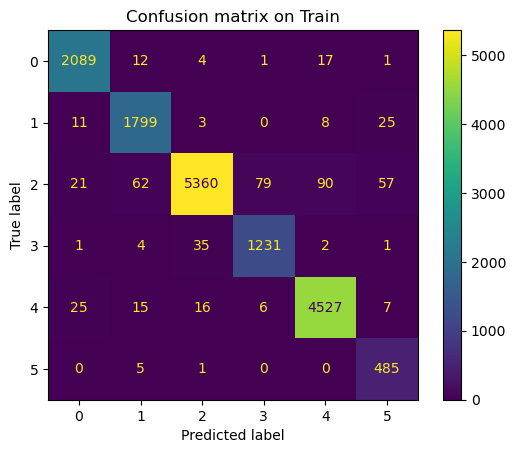

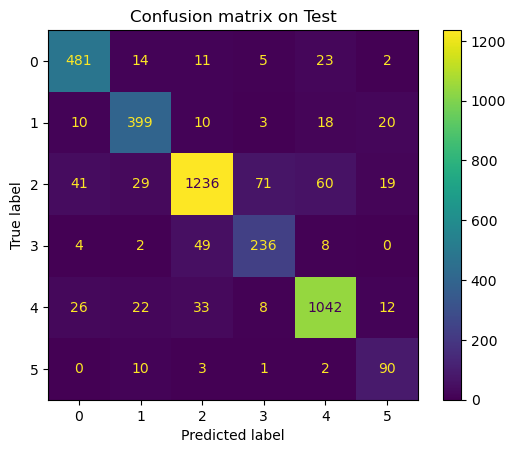

In [6]:
evaluate_model(lr_model, X_train, X_test, y_train, y_test, include_training=True)

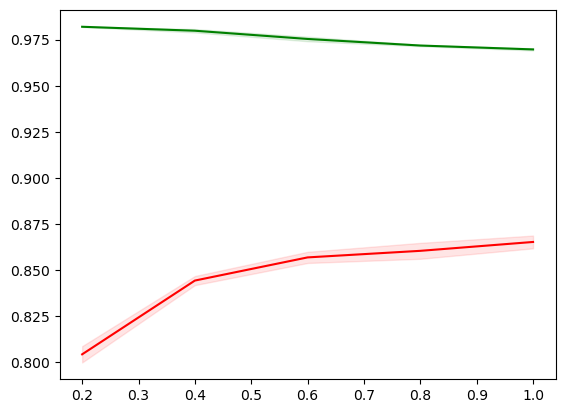

In [7]:
draw_learning_curve(lr_model, X_train, y_train)

# Multiple tuning

## L1 regularization

First, we try to plot the validation score through a list of C from 0.001 to 100

In [8]:
C_list = [0.001, 0.01, 0.1, 1, 5, 10, 100]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    lr_model = LogisticRegression(C=c, penalty='l1', solver='liblinear', multi_class='ovr')
    lr_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, lr_model.predict(X_train))
    cv_score = np.mean(cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.001, 0.01, 0.1, 1, 5, 10, 100]
[0.3390625, 0.3388125, 0.8553125, 0.9159375, 0.98325, 0.9850625, 0.9863125]
[0.3368125, 0.3386875, 0.8334999999999999, 0.8641250000000001, 0.8614375000000001, 0.8583125, 0.851]


[Text(0, 0, '0.001'),
 Text(1, 0, '0.01'),
 Text(2, 0, '0.1'),
 Text(3, 0, '1'),
 Text(4, 0, '5'),
 Text(5, 0, '10'),
 Text(6, 0, '100')]

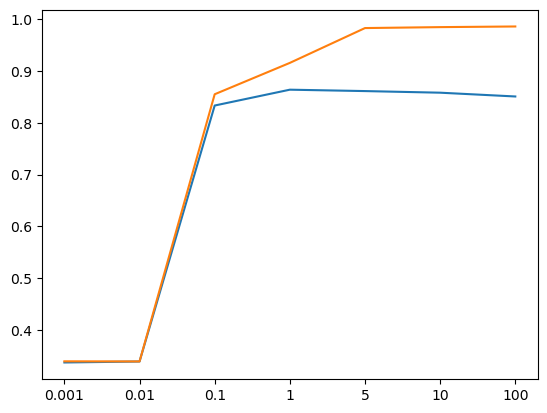

In [9]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We can see the good value of $C$ is near $C = 1$, then we scope to $C=1$:

In [10]:
C_list = [0.1, 0.25, 0.5, 1, 1.25, 1.5, 1.75, 2]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    lr_model = LogisticRegression(C=c, penalty='l1', solver='liblinear', multi_class='ovr')
    lr_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, lr_model.predict(X_train))
    cv_score = np.mean(cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.1, 0.25, 0.5, 1, 1.25, 1.5, 1.75, 2]
[0.8553125, 0.874375, 0.8895625, 0.9160625, 0.927375, 0.9419375, 0.9563125, 0.9716875]
[0.8334999999999999, 0.857375, 0.86175, 0.8640625, 0.8644375, 0.8633124999999999, 0.8636250000000001, 0.8627500000000001]


[Text(0, 0, '0.1'),
 Text(1, 0, '0.25'),
 Text(2, 0, '0.5'),
 Text(3, 0, '1'),
 Text(4, 0, '1.25'),
 Text(5, 0, '1.5'),
 Text(6, 0, '1.75'),
 Text(7, 0, '2')]

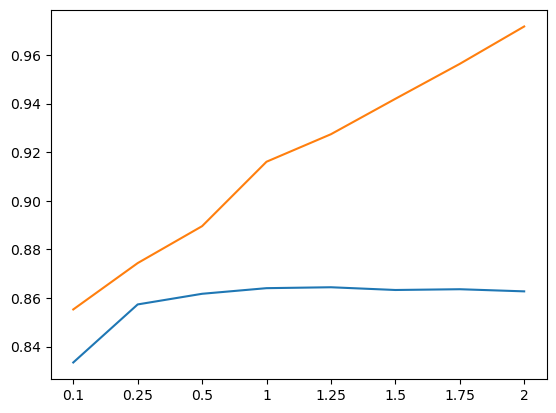

In [11]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We choose $C=1.25$ to be the best one

In [22]:
best_l1_lr_model = LogisticRegression(C=1.25, penalty='l1', solver='liblinear', multi_class='ovr')

Score of on train are:
	- Accuracy score: 0.9274
	- Micro F1 score: 0.9274
	- Macro F1 score: 0.9062
Score of on test are:
	- Accuracy score: 0.8675
	- Micro F1 score: 0.8675
	- Macro F1 score: 0.8274


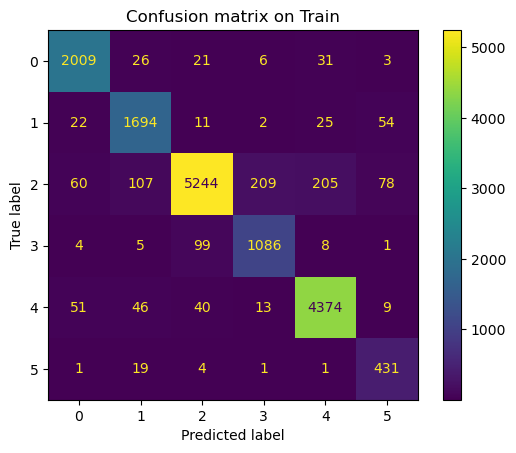

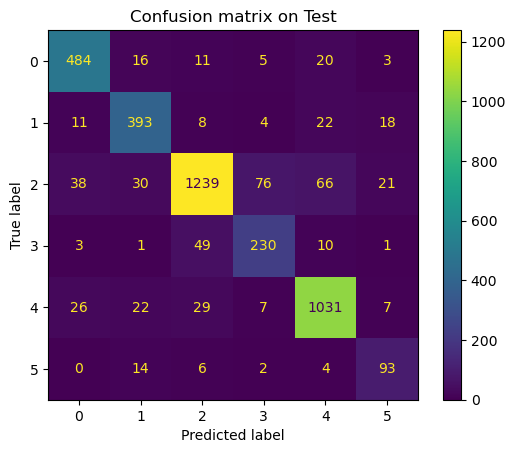

In [23]:
best_l1_lr_model.fit(X_train, y_train)
evaluate_model(best_l1_lr_model, X_train, X_test, y_train, y_test, include_training=True)

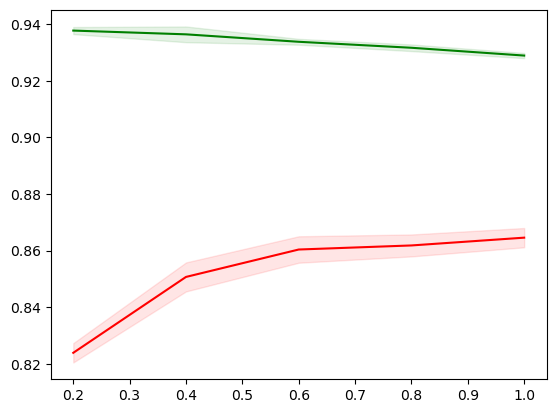

In [24]:
draw_learning_curve(best_l1_lr_model, X_train, y_train)

## L2 regularization

We do the same things from here

In [25]:
C_list = [0.001, 0.01, 0.1, 1, 5, 10, 100]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    lr_model = LogisticRegression(C=c, penalty='l2', solver='lbfgs', multi_class='ovr')
    lr_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, lr_model.predict(X_train))
    cv_score = np.mean(cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.001, 0.01, 0.1, 1, 5, 10, 100]
[0.3533125, 0.622, 0.90475, 0.9681875, 0.9833125, 0.98475, 0.9863125]
[0.34331249999999996, 0.584625, 0.8376250000000001, 0.86525, 0.8654999999999999, 0.8634375000000001, 0.8540625000000001]


[Text(0, 0, '0.001'),
 Text(1, 0, '0.01'),
 Text(2, 0, '0.1'),
 Text(3, 0, '1'),
 Text(4, 0, '5'),
 Text(5, 0, '10'),
 Text(6, 0, '100')]

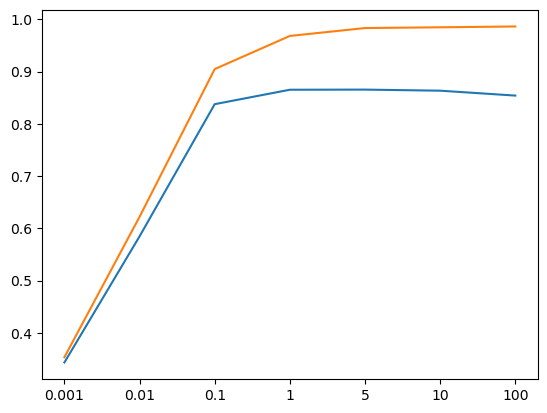

In [26]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

It looks like good $C$ is still near $1$

In [27]:
C_list = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    lr_model = LogisticRegression(C=c, penalty='l2', solver='lbfgs', multi_class='ovr')
    lr_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, lr_model.predict(X_train))
    cv_score = np.mean(cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
[0.9371875, 0.9559375, 0.9629375, 0.9681875, 0.9714375, 0.9735, 0.975, 0.9766875]
[0.8557500000000001, 0.8615, 0.8641249999999999, 0.86525, 0.86575, 0.8655625, 0.8650625000000002, 0.864875]


[Text(0, 0, '0.25'),
 Text(1, 0, '0.5'),
 Text(2, 0, '0.75'),
 Text(3, 0, '1'),
 Text(4, 0, '1.25'),
 Text(5, 0, '1.5'),
 Text(6, 0, '1.75'),
 Text(7, 0, '2')]

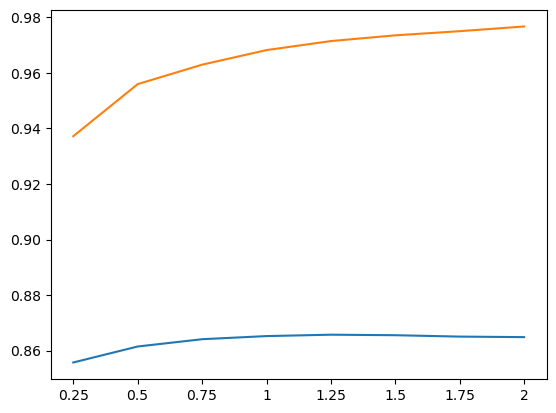

In [28]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We choose $C=1.25$

In [29]:
best_l2_lr_model = LogisticRegression(C=1.25, penalty='l2', solver='lbfgs', multi_class='ovr')

Score of on train are:
	- Accuracy score: 0.9714
	- Micro F1 score: 0.9714
	- Macro F1 score: 0.9624
Score of on test are:
	- Accuracy score: 0.8712
	- Micro F1 score: 0.8713
	- Macro F1 score: 0.8354


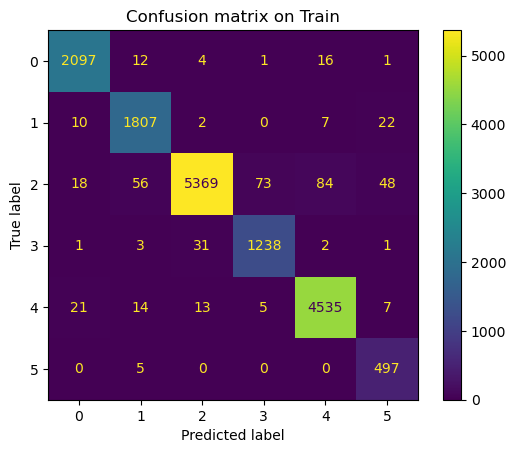

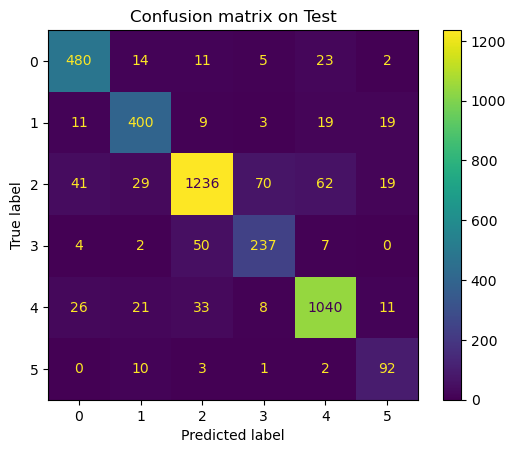

In [30]:
best_l2_lr_model.fit(X_train, y_train)
evaluate_model(best_l2_lr_model, X_train, X_test, y_train, y_test, include_training=True)

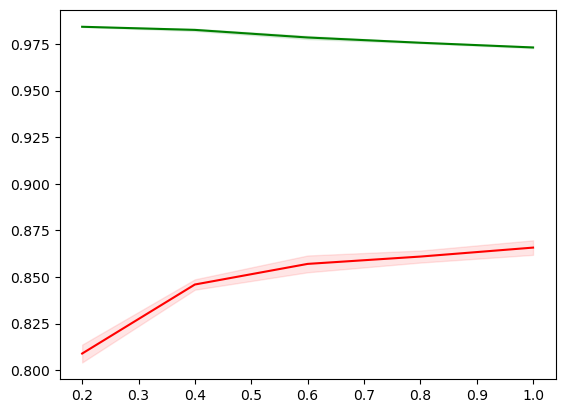

In [31]:
draw_learning_curve(best_l2_lr_model, X_train, y_train)

## Elastic regularization

In [32]:
dict_param = {
    'C' : [0.001, 0.01, 0.1, 1, 5, 10, 100],
    'l1_ratio' : np.linspace(0.1, 0.9, 5)
}

lr_model = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='ovr')
grid_search = GridSearchCV(lr_model, dict_param, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='ovr',
                                          penalty='elasticnet', solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
                         'l1_ratio': array([0.1, 0.3, 0.5, 0.7, 0.9])},
             scoring='accuracy')

In [35]:
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    l1_ratio = [val['l1_ratio'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
print(df)
df = df[df['score'] < 0.85]
print("Bad hyperparameter:")
for param in dict_param:
  for value in dict_param[param]:
    if len(df[df[param] == value]) == 35 // len(dict_param[param]):
      print(param, value)

          C  l1_ratio     score
0     0.001       0.1  0.338688
1     0.001       0.3  0.338688
2     0.001       0.5  0.338688
3     0.001       0.7  0.338688
4     0.001       0.9  0.338688
5     0.010       0.1  0.521188
6     0.010       0.3  0.350500
7     0.010       0.5  0.339000
8     0.010       0.7  0.338687
9     0.010       0.9  0.338687
10    0.100       0.1  0.837938
11    0.100       0.3  0.833937
12    0.100       0.5  0.830187
13    0.100       0.7  0.830688
14    0.100       0.9  0.830375
15    1.000       0.1  0.864812
16    1.000       0.3  0.865750
17    1.000       0.5  0.865563
18    1.000       0.7  0.866313
19    1.000       0.9  0.865750
20    5.000       0.1  0.866687
21    5.000       0.3  0.866812
22    5.000       0.5  0.867500
23    5.000       0.7  0.867375
24    5.000       0.9  0.866937
25   10.000       0.1  0.867062
26   10.000       0.3  0.867125
27   10.000       0.5  0.867000
28   10.000       0.7  0.867563
29   10.000       0.9  0.867062
30  100.

In [5]:
dict_param = {
    'C' : np.logspace(0, 2, 5),
    'l1_ratio' : np.linspace(0.1, 0.9, 5)
}

lr_model = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='ovr')
grid_search = GridSearchCV(lr_model, dict_param, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='ovr',
                                          penalty='elasticnet', solver='saga'),
             n_jobs=-1,
             param_grid={'C': array([  1.        ,   3.16227766,  10.        ,  31.6227766 ,
       100.        ]),
                         'l1_ratio': array([0.1, 0.3, 0.5, 0.7, 0.9])},
             scoring='accuracy')

In [6]:
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    l1_ratio = [val['l1_ratio'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
print(df)

             C  l1_ratio     score
0     1.000000       0.1  0.864875
1     1.000000       0.3  0.865812
2     1.000000       0.5  0.865500
3     1.000000       0.7  0.866375
4     1.000000       0.9  0.865875
5     3.162278       0.1  0.867125
6     3.162278       0.3  0.867125
7     3.162278       0.5  0.867313
8     3.162278       0.7  0.867000
9     3.162278       0.9  0.867250
10   10.000000       0.1  0.867000
11   10.000000       0.3  0.866938
12   10.000000       0.5  0.867188
13   10.000000       0.7  0.867250
14   10.000000       0.9  0.866937
15   31.622777       0.1  0.866938
16   31.622777       0.3  0.866812
17   31.622777       0.5  0.866812
18   31.622777       0.7  0.866938
19   31.622777       0.9  0.867250
20  100.000000       0.1  0.866750
21  100.000000       0.3  0.866750
22  100.000000       0.5  0.866875
23  100.000000       0.7  0.866437
24  100.000000       0.9  0.867062


In [7]:
print(grid_search.best_estimator_, grid_search.best_score_)

LogisticRegression(C=3.1622776601683795, l1_ratio=0.5, multi_class='ovr',
                   penalty='elasticnet', solver='saga') 0.8673125


In [8]:
best_en_lr_model = LogisticRegression(C=3.1622776601683795, l1_ratio=0.5, multi_class='ovr',
                   penalty='elasticnet', solver='saga')

Score of on train are:
	- Accuracy score: 0.9646
	- Micro F1 score: 0.9646
	- Macro F1 score: 0.9531
Score of on test are:
	- Accuracy score: 0.8720
	- Micro F1 score: 0.8720
	- Macro F1 score: 0.8316


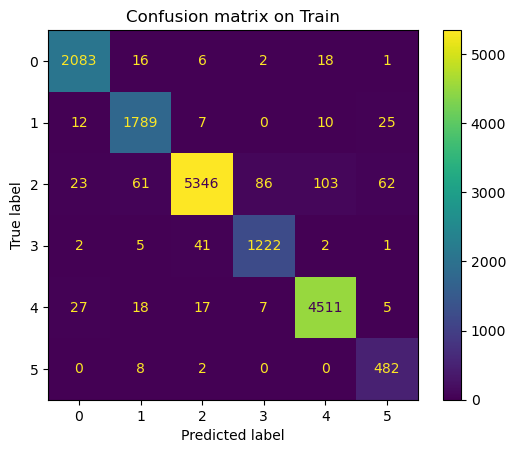

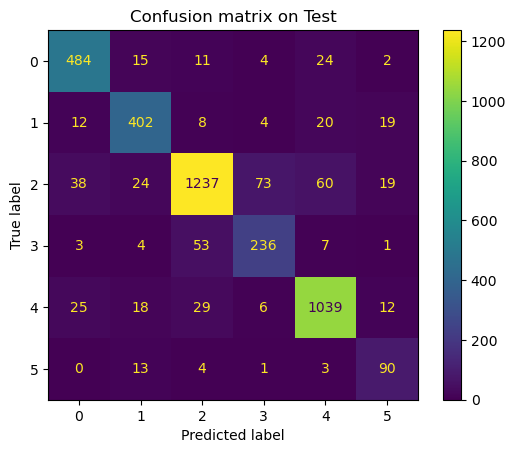

In [11]:
best_en_lr_model.fit(X_train, y_train)
evaluate_model(best_en_lr_model, X_train, X_test, y_train, y_test, include_training=True)

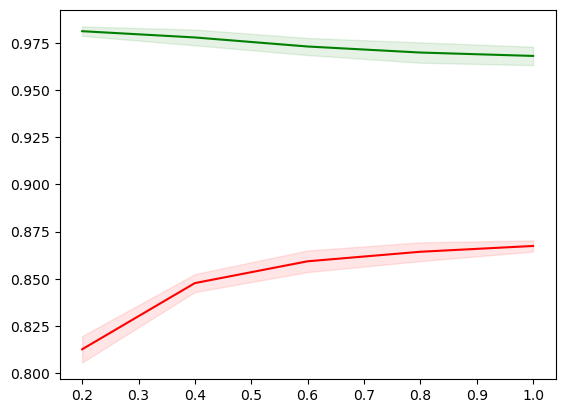

In [10]:
draw_learning_curve(best_en_lr_model, X_train, y_train)

# Conclusion

There are a few difference among the accuracy of these 3 regularization. However, Elastic-net regularization gives the best performance then I will choose it to be the best model in this notebook.

In [12]:
best_lr_model = best_en_lr_model

In [13]:
directory = "data/models/lr/"

dump(best_lr_model, directory + "best_lr_bow_l1_model.joblib")

['data/models/lr/best_lr_bow_l1_model.joblib']